# Tarea Big Data

### Importar Librerias

In [1]:
suppressWarnings(suppressMessages(library(ff)))
suppressWarnings(suppressMessages(library(ffbase)))
suppressWarnings(suppressMessages(library(biglm)))

## Punto 1. Con el paquete ff en R genere una matriz M de tamaño 1,000 X 10,000

### Cárguela con números aleatorios.

In [2]:
M <- ff(rnorm(1000*10000), dim=c(1000,10000))

### Calcule para 4 columnas tomadas al azar de la matriz M los índices mean(), sd() y el max().

Creamos una función que obtenga una columna aleatoria de la matriz, y nos devuelva las 3 estadísticas requeridas.

In [3]:
set.seed('4')
estadisticas_cols <- function() {
    col1=M[,sample(1:10000, 1)]
    print(c('promedio',mean(col1)))
    print(c('desviación estandar',sd(col1)))
    print(c('máximo',max(col1)))
    cat('\n')
}

In [4]:
# Columna 1
estadisticas_cols()
# Columna 2
estadisticas_cols()
# Columna 3
estadisticas_cols()
# Columna 4
estadisticas_cols()

[1] "promedio"           "0.0822639924021322"
[1] "desviación estandar" "0.996317135990122"  
[1] "máximo"           "3.03478951694666"

[1] "promedio"           "0.0287870148330627"
[1] "desviación estandar" "0.999956295682968"  
[1] "máximo"           "3.09870758925352"

[1] "promedio"            "-0.0687663274511846"
[1] "desviación estandar" "1.03597541047072"   
[1] "máximo"           "3.97566554630948"

[1] "promedio"          "0.030690102825997"
[1] "desviación estandar" "1.00785088675591"   
[1] "máximo"          "2.8721111184255"



### Para 2 columnas al azar c1 y c2 calcule cor( M[,c1],M[,c2] ) y explique la Correlación encontrada.

In [5]:
col1=M[,sample(1:10000, 1)]
col2=M[,sample(1:10000, 1)]
cor(col1,col2)

[1] 0.0293065

### Realice un gráfico tipo plot con 2 columnas tomadas al azar de la matriz M. Explique el Resultado plasmado en la gráfica


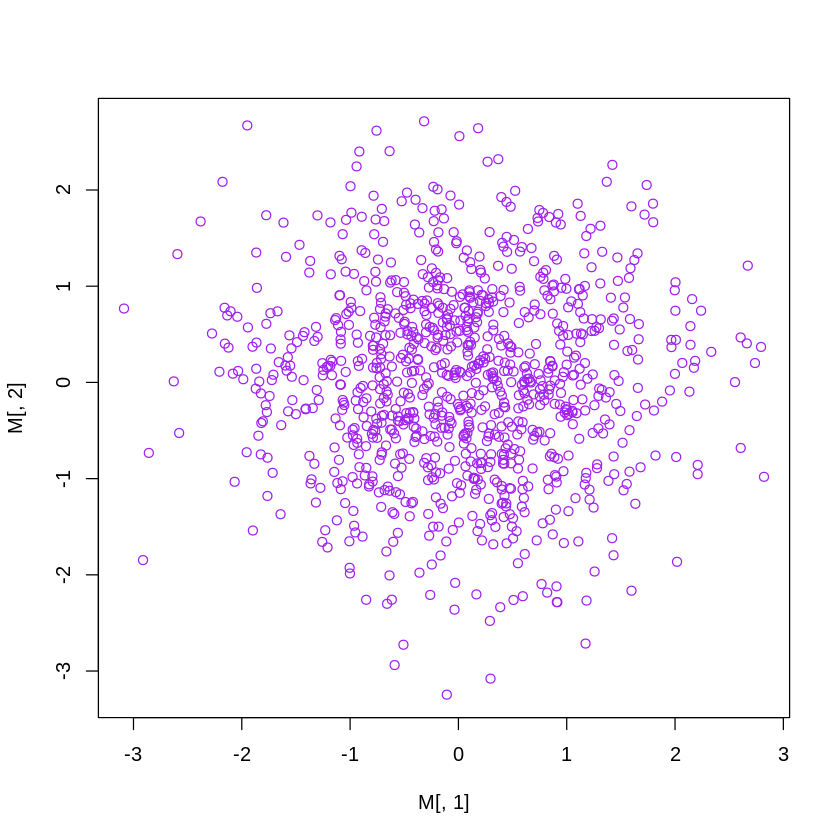

In [6]:
plot(M[,1],M[,2], col = "purple")

#### Como cada elemento de la matriz fue generado con números aleatorios y una distribución normal(0,1), entonces vemos una mayor concentración de puntos justo en el centro como era de esperarse

In [7]:
random_dataframe <- as.data.frame(M[,1:2])
random_dataframe_ff <- as.ffdf(random_dataframe)
class(random_dataframe_ff)
head(random_dataframe_ff)

[1] "ffdf"

,V1,V2
,<dbl>,<dbl>
1,-0.76688424,1.1499780
2,0.09471718,-0.4412204
3,1.08955428,0.5066623
4,-0.53175157,0.2537100
5,-0.10110312,0.3420082
6,-0.18527666,0.7221795


In [8]:
mymodel <- biglm(V1 ~ V2, data = random_dataframe_ff)
summary(mymodel)

Large data regression model: biglm(V1 ~ V2, data = random_dataframe_ff)
Sample size =  1000 
               Coef    (95%    CI)     SE      p
(Intercept)  0.0175 -0.0437 0.0787 0.0306 0.5677
V2          -0.0089 -0.0717 0.0539 0.0314 0.7771

### Aquí estamos tomando la variavle v1 como la dependiente y la v1 como la dependiente y v1 como la independiente

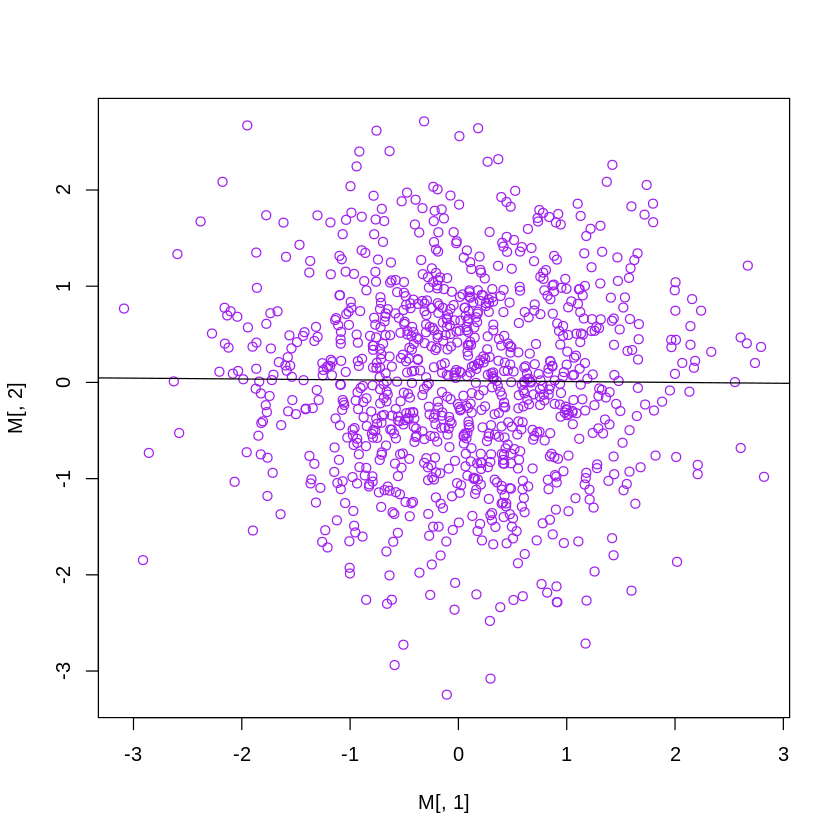

In [9]:
plot(M[,1],M[,2], col = "purple")
abline(mymodel)

### Como era de esperarase, obtenemos una linea horizontal ya que solo tenemos números aleatorios

## Punto 2. El alumno deberá explicar, analizar, implementar, evaluar  y comparar una máquina con aprendizaje no supervisado en paralelo considerando el método de clasificación jerárquica

In [10]:
#install.packages('snow',dependencies=TRUE)
#install.packages('MASS',dependencies=TRUE)
library(MASS)
library(snow)

Warning message:
“package ‘MASS’ was built under R version 4.0.3”


### Usando lapply y la funcion hclust construya 7 árboles binarios con los métodos ward, single, complete, average, mcquitty, median y centroid, mida el tiempo de ejecución y grafique los 7 árboles en una sola ventana.

In [11]:
iris <- datasets::iris
iris2 <- iris[,-5]
species_labels <- iris[,5]
library(colorspace) # get nice colors
library(dendextend)
species_col <- rev(rainbow_hcl(3))[as.numeric(species_labels)]

Warning message:
“package ‘colorspace’ was built under R version 4.0.3”
Warning message:
“package ‘dendextend’ was built under R version 4.0.2”

---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




#### Usando un for loop

In [12]:
hclust_methods <- c("ward.D", "single", "complete", "average", "mcquitty", 
        "median", "centroid", "ward.D2")
d_iris <- dist(iris2) # method="man" # is a bit better

iris_dendlist <- dendlist()
for(i in seq_along(hclust_methods)) {
   hc_iris <- hclust(d_iris, method = hclust_methods[i])   
   iris_dendlist <- dendlist(iris_dendlist, as.dendrogram(hc_iris))
}
names(iris_dendlist) <- hclust_methods
iris_dendlist

$ward.D
'dendrogram' with 2 branches and 150 members total, at height 199.6205 

$single
'dendrogram' with 2 branches and 150 members total, at height 1.640122 

$complete
'dendrogram' with 2 branches and 150 members total, at height 7.085196 

$average
'dendrogram' with 2 branches and 150 members total, at height 4.062683 

$mcquitty
'dendrogram' with 2 branches and 150 members total, at height 4.497283 

$median
'dendrogram' with 2 branches and 150 members total, at height 2.82744 

$centroid
'dendrogram' with 2 branches and 150 members total, at height 2.994307 

$ward.D2
'dendrogram' with 2 branches and 150 members total, at height 32.44761 

attr(,"class")
[1] "dendlist"

#### Usando la función lapply

In [13]:
hclust_methods <- c("ward.D", "single", "complete", "average", "mcquitty", 
        "median", "centroid", "ward.D2")

hc_iris <- lapply(hclust_methods, function(method) hclust(d_iris, 
        method = method))
                      
iris_dendlist <- dendlist()
iris_dendlist <- lapply(hc_iris, function(hc) dendlist(iris_dendlist, 
        as.dendrogram(hc)))

names(iris_dendlist) <- hclust_methods
iris_dendlist

$ward.D
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 199.6205 

attr(,"class")
[1] "dendlist"

$single
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 1.640122 

attr(,"class")
[1] "dendlist"

$complete
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 7.085196 

attr(,"class")
[1] "dendlist"

$average
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 4.062683 

attr(,"class")
[1] "dendlist"

$mcquitty
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 4.497283 

attr(,"class")
[1] "dendlist"

$median
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 2.82744 

attr(,"class")
[1] "dendlist"

$centroid
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 2.994307 

attr(,"class")
[1] "dendlist"

$ward.D2
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 32.44761 

attr(,"class")
[1] "dendlist"


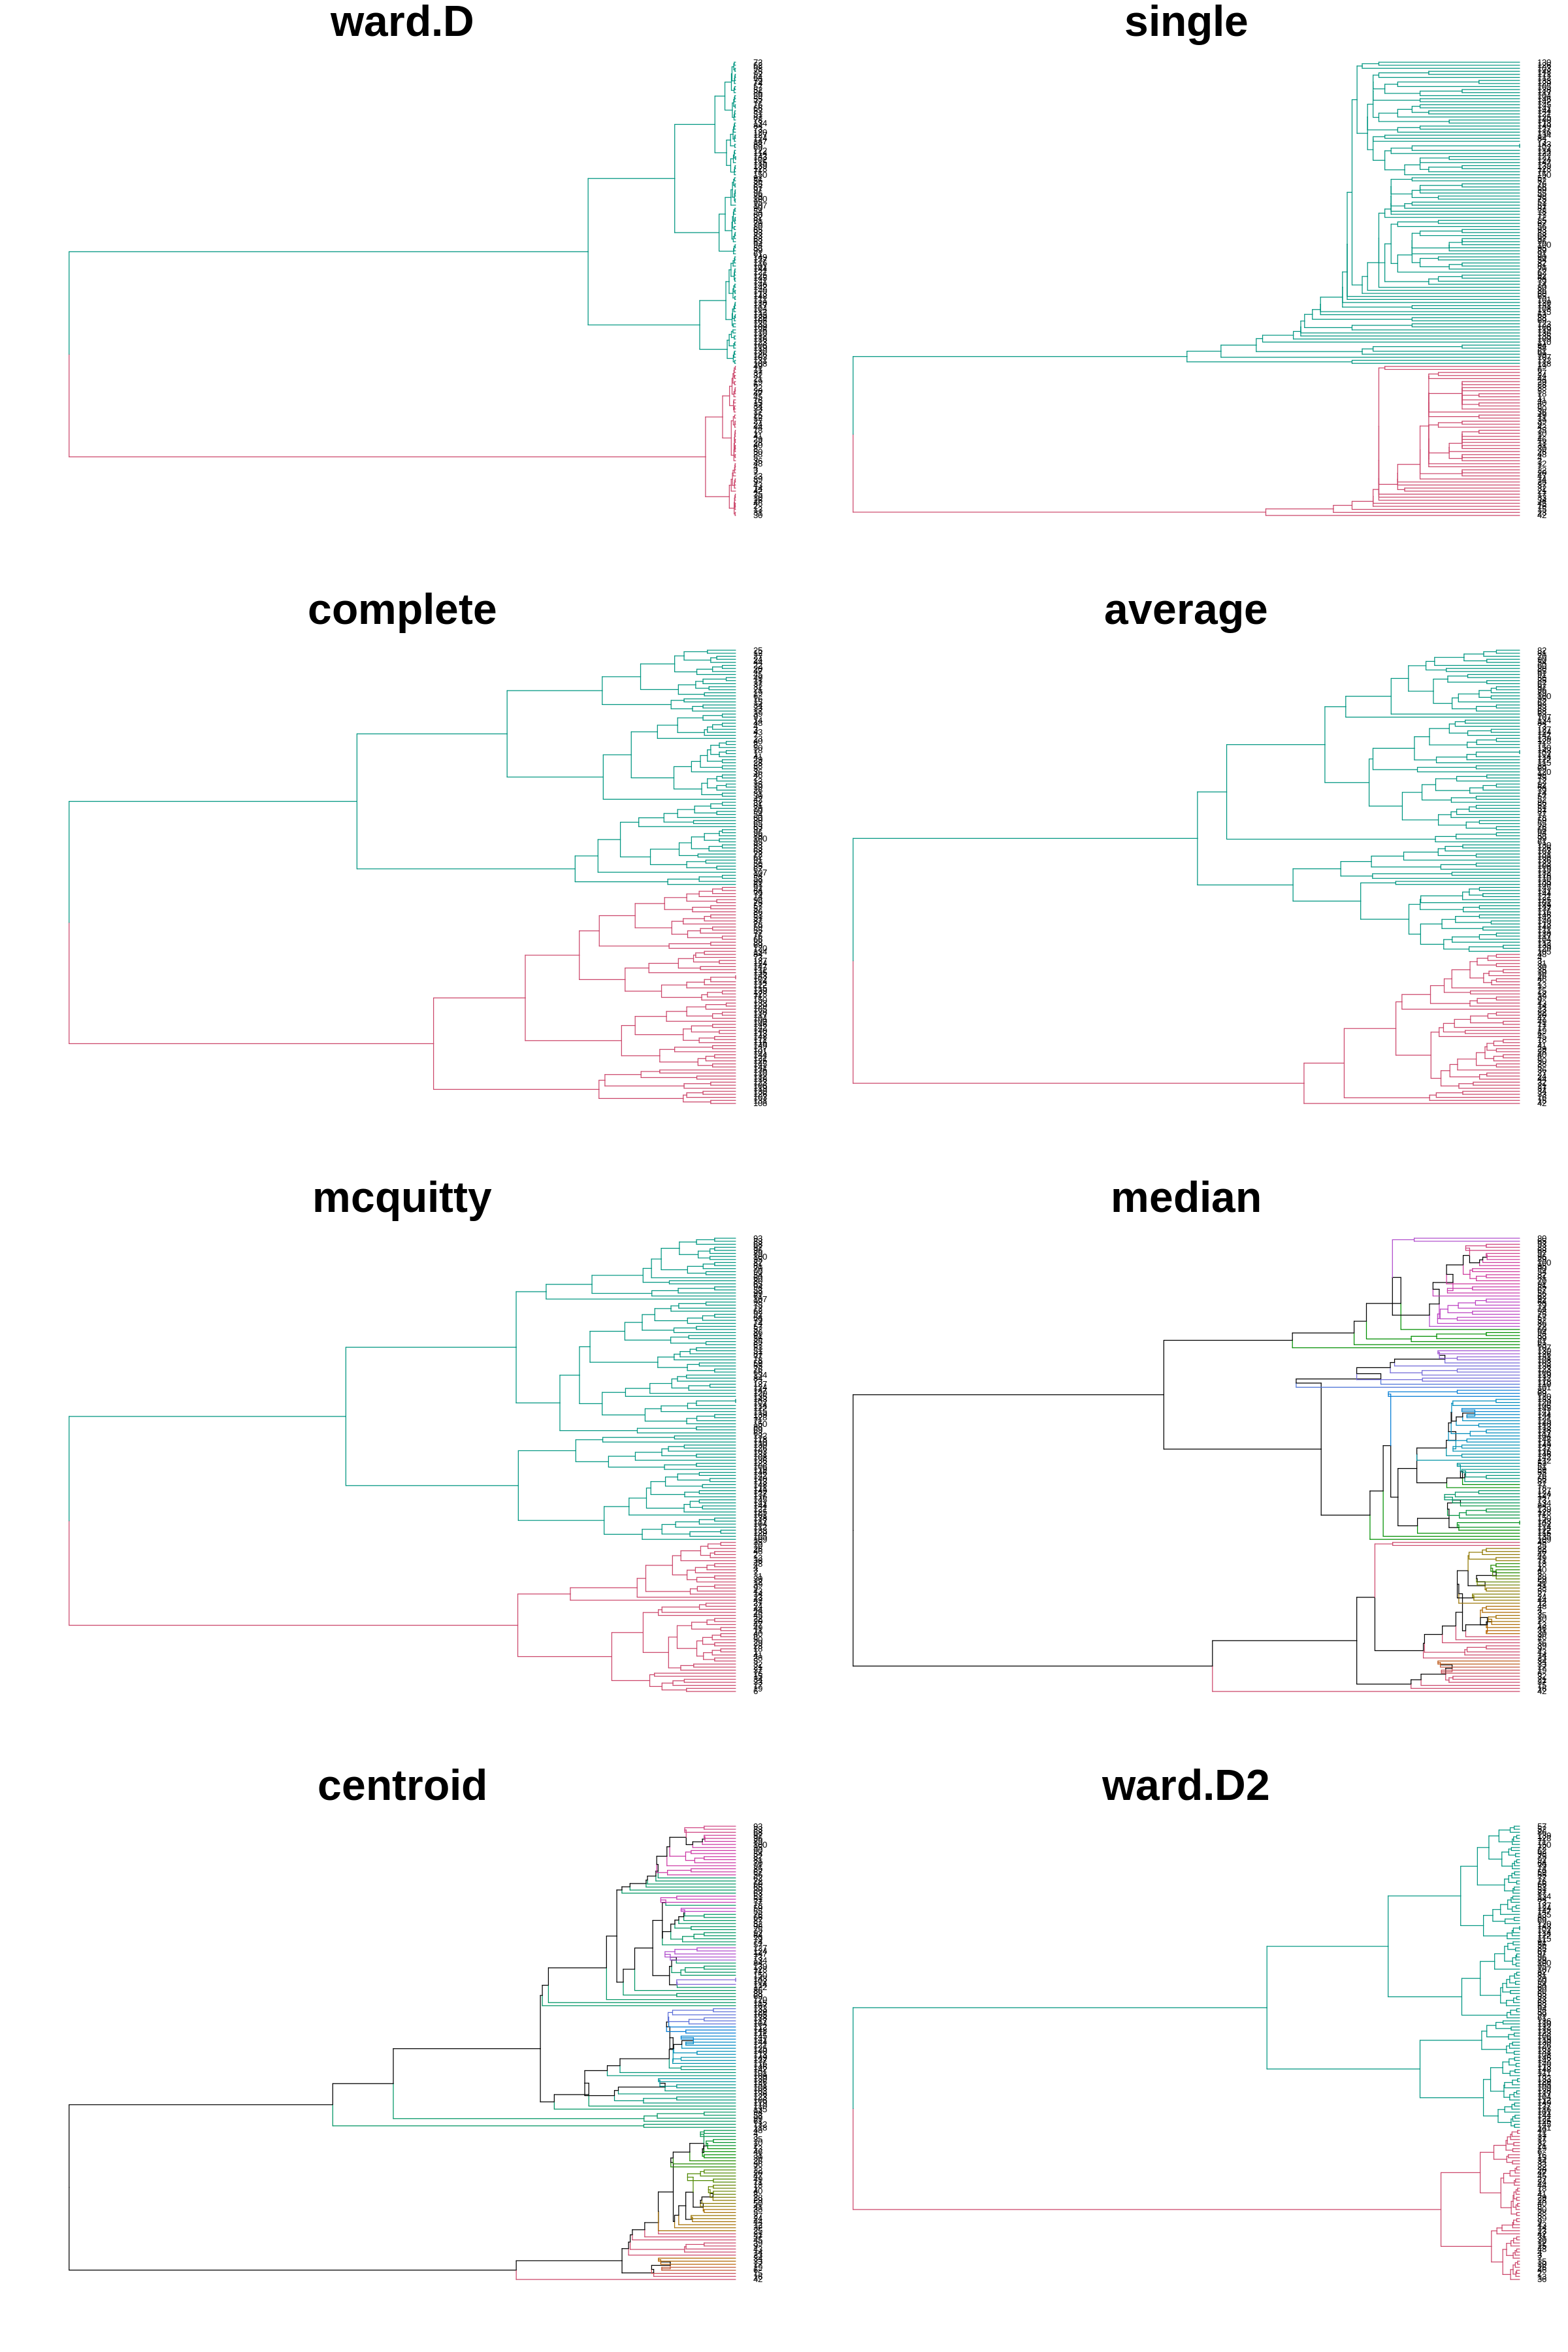

In [14]:
par(mfrow = c(4,2),cex.lab=10, cex.main=5)
options(repr.plot.width = 20)
options(repr.plot.height = 30)
for(i in 1:8) {
   iris_dendlist[[i]] %>% set("branches_k_color", k=2) %>% plot(axes = FALSE, horiz = TRUE)
   title(names(iris_dendlist)[i])
}


### Usando clusterApply del paquete snow paralelice el proceso anterior usando 7 peones o procesadores, mida el tiempo de ejecución y compárelo con el anterior

In [15]:
# usaremos 8 'peones' en una máquina local usando un 'socket'
cl <- makeCluster(8, type = "SOCK")
# carga el paquete MASS en cada peón haciendo visibles la Tabla de Datos
# Boston en cada peón o procesador
ignore <- clusterEvalQ(cl, {
library(dendextend)
iris <- datasets::iris
iris2 <- iris[,-5]
d_iris <- dist(iris2) # method="man" # is a bit better
iris_dendlist <- dendlist()
})


#### Ahora haciéndolo en paralelo



In [16]:
hclust_methods <- c("ward.D", "single", "complete", "average", "mcquitty", 
        "median", "centroid", "ward.D2")

hc_iris <- clusterApply(cl, hclust_methods, function(method) hclust(d_iris, 
        method = method))
                      

iris_dendlist <- clusterApply(cl, hc_iris, function(hc) dendlist(iris_dendlist, 
        as.dendrogram(hc)))

names(iris_dendlist) <- hclust_methods
iris_dendlist

$ward.D
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 199.6205 

attr(,"class")
[1] "dendlist"

$single
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 1.640122 

attr(,"class")
[1] "dendlist"

$complete
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 7.085196 

attr(,"class")
[1] "dendlist"

$average
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 4.062683 

attr(,"class")
[1] "dendlist"

$mcquitty
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 4.497283 

attr(,"class")
[1] "dendlist"

$median
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 2.82744 

attr(,"class")
[1] "dendlist"

$centroid
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 2.994307 

attr(,"class")
[1] "dendlist"

$ward.D2
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 32.44761 

attr(,"class")
[1] "dendlist"


In [17]:
stopCluster(cl)  # Finaliza la computación paralela


### Comparaando los tiempos

In [21]:
iris <- datasets::iris
iris2 <- iris

system.time(lapply(hclust_methods, function(method) hclust(d_iris, 
        method = method)))
iris_dendlist <- dendlist()
system.time(lapply(hc_iris, function(hc) dendlist(iris_dendlist, 
        as.dendrogram(hc))))

   user  system elapsed 
  0.007   0.000   0.008 

   user  system elapsed 
  0.032   0.000   0.031 

In [22]:
# usaremos 8 'peones' en una máquina local usando un 'socket'
cl <- makeCluster(8, type = "SOCK")
# carga el paquete MASS en cada peón haciendo visibles la Tabla de Datos
# Boston en cada peón o procesador
ignore <- clusterEvalQ(cl, {
library(dendextend)
iris <- datasets::iris
iris2 <- iris
d_iris <- dist(iris2) # method="man" # is a bit better
iris_dendlist <- dendlist()
})
system.time(
hc_iris <- clusterApply(cl, hclust_methods, function(method) hclust(d_iris, 
        method = method)))
                      

system.time(iris_dendlist <- clusterApply(cl, hc_iris, function(hc) dendlist(iris_dendlist, 
        as.dendrogram(hc))))                             
stopCluster(cl)  # Finaliza la computación paralela


   user  system elapsed 
  0.002   0.000   0.004 

   user  system elapsed 
  0.004   0.000   0.017 

#### ref

Galili, T. (2020). Hierarchical cluster analysis on famous data sets - enhanced with the dendextend package. Retrieved 17 April 2021, from https://cran.r-project.org/web/packages/dendextend/vignettes/Cluster_Analysis.html